In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import os

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS3540/CS3540-Final-Project-G12/'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['prisondata.csv', 'Prison Data Information and Vars.gdoc', 'CS3540 Proposal Report G12.gdoc', 'Prison-Audrey.ipynb', 'Prison.ipynb', 'Final Proposal Report.gdoc', 'prisondata.gsheet', 'Prison-Austin.ipynb', 'Planning and Brainstorming.gdoc', 'crime_and_incarceration_by_state.csv', 'crime_and_incarseration_by_state website.gdoc', 'unemployment.csv', 'NEW Proj Prop.gdoc', 'Navy and Yellow Illustrative Spooky Halloween.gslides', 'Prison-Ava.ipynb']


In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures

In [5]:
path = GOOGLE_DRIVE_PATH + '/prisondata.csv'

# reading in the data and selecting data features to investigate
# AIDSCONM: male inmates confirmed to have AIDS
# AIDSCONF: female inmates confirmed to have AIDS
# CUSUNSM: unsentenced male inmates
# CUSUNSF: unsentenced female inmates
# CUSLT1M: male inmates with a maximum sentence less than 1 year
# CUSLT1F: female inmates with a maximum sentence less than 1 year
# CUSGT1M: male inmates with a maximum sentence greater than 1 year
# CUSGT1F: female inmates with a maximum sentence greater than 1 year
# DTHHOM1M: deaths among male inmates due to homicide
# DTHHOM1F: deaths among female inmates due to homicide
# DTHSUICM: deaths among male inmates due to suicide
# DTHSUICF: deaths among female inmates due to suicide
# RLDEATHM: total deaths among male inmates
# RLDEATHF: total deaths among female inmates
# CAPDESM: design capacity for male inmates
# CAPDESF: design capacity for female inmates
# CAPRATEM: rated capacity for male inmates
# CAPRATEF: rated capacity for female inmates
# CUSTOTM: total male inmates in custody
# CUSTOTF: total female inmates in custody

prison_data = pd.read_csv(path)
prison_data_all = pd.read_csv(path, usecols = ['YEAR', 'STATE', 'AIDSCONM', 'AIDSCONF', 'CUSUNSM', 'CUSUNSF', 'CUSLT1M', 'CUSLT1F', 'CUSGT1M', 'CUSGT1F', 'DTHHOMIM', 'DTHHOMIF', 'DTHSUICM', 'DTHSUICF', 'RLDEATHM', 'RLDEATHF', 'CAPDESM', 'CAPDESF', 'CAPRATEM', 'CAPRATEF', 'CUSTOTM', 'CUSTOTF'])
# prison_data = pd.read_csv(path, usecols = ['YEAR', 'STATE', 'CUSUNSM', 'CUSUNSF', 'CUSLT1M', 'CUSLT1F', 'CUSGT1M', 'CUSGT1F', 'DTHSUICM', 'DTHSUICF', 'CUSTOTM', 'CUSTOTF'])

In [6]:
prison_data = prison_data[prison_data['YEAR'] > 1982]
prison_data_all = prison_data_all[prison_data_all['YEAR'] > 1982]

In [7]:
prison_data

,YEAR,STATEID,STATE,REGION,CUSGT1M,CUSGT1F,CUSLT1M,CUSLT1F,CUSUNSM,CUSUNSF,...,DTHHOMOM,DTHHOMOF,DTHPERSM,DTHPERSF,DTHOTHM,DTHOTHF,DTHTOTM,DTHTOTF,HANDLEM,HANDLEF
270,1983,1,AL,(3) South,8267.0,420.0,160.0,8.0,0.0,0.0,...,NaN,NaN,0.0,0.0,22.0,2.0,NaN,NaN,NaN,NaN
271,1983,2,AK,(4) West,776.0,32.0,124.0,11.0,384.0,23.0,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
272,1983,4,AZ,(4) West,6432.0,311.0,134.0,12.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
273,1983,5,AR,(3) South,3940.0,188.0,NaN,NaN,0.0,0.0,...,NaN,NaN,3.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
274,1983,6,CA,(4) West,36275.0,1750.0,0.0,0.0,1078.0,270.0,...,NaN,NaN,11.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,2011,55,WI,(2) Midwest,19201.0,1061.0,54.0,1.0,1938.0,112.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1832,2011,56,WY,(4) West,1688.0,229.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1833,2011,60,ST,(7) State total,1082106.0,77724.0,20976.0,3642.0,11804.0,1456.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1834,2011,70,US,(5) U.S. total,1232996.0,88537.0,22991.0,4266.0,22985.0,2161.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
nan_counts = prison_data.isna().sum()
print(f"\nNaN counts per column:\n{nan_counts}")


NaN counts per column:
YEAR          0
STATEID       0
STATE         0
REGION        0
CUSGT1M      11
           ... 
DTHSUICF    351
DTHACCM     360
DTHACCF     347
DTHOTHM     332
DTHOTHF     329
Length: 72, dtype: int64


In [9]:
sentence_data = prison_data[['CUSGT1M', 'CUSGT1F', 'CUSLT1M', 'CUSLT1F', 'CUSUNSM', 'CUSUNSF', 'CUSTOTM', 'CUSTOTF', 'DTHSUICM', 'DTHSUICF']]
sentence_data.shape

(1566, 10)

In [10]:
sentence_data = sentence_data.dropna()
sentence_data.shape

(887, 10)

In [11]:
sentence_data['GT1M-ratio'] = sentence_data['CUSGT1M'] / sentence_data['CUSTOTM']
sentence_data['GT1F-ratio'] = sentence_data['CUSGT1F'] / sentence_data['CUSTOTF']

sentence_data['GT1-ratio'] = sentence_data['CUSGT1M'] + sentence_data['CUSGT1F'] / sentence_data['CUSTOTM'] + sentence_data['CUSTOTF']

sentence_data['LT1M-ratio'] = sentence_data['CUSLT1M'] / sentence_data['CUSTOTM']
sentence_data['LT1F-ratio'] = sentence_data['CUSLT1F'] / sentence_data['CUSTOTF']

sentence_data['LT1-ratio'] = sentence_data['CUSLT1M'] + sentence_data['CUSLT1F'] / sentence_data['CUSTOTM'] + sentence_data['CUSTOTF']

sentence_data['UNSM-ratio'] = sentence_data['CUSUNSM'] / sentence_data['CUSTOTM']
sentence_data['UNSF-ratio'] = sentence_data['CUSUNSF'] / sentence_data['CUSTOTF']

sentence_data['UNS-ratio'] = sentence_data['CUSUNSM'] + sentence_data['CUSUNSF'] / sentence_data['CUSTOTM'] + sentence_data['CUSTOTF']

sentence_data['SUICM-ratio'] = sentence_data['DTHSUICM'] / sentence_data['CUSTOTM']
sentence_data['SUICF-ratio'] = sentence_data['DTHSUICF'] / sentence_data['CUSTOTF']

sentence_data['SUIC-ratio'] = sentence_data['DTHSUICM'] + sentence_data['DTHSUICF'] / sentence_data['CUSTOTM'] + sentence_data['CUSTOTF']

sentence_data


,CUSGT1M,CUSGT1F,CUSLT1M,CUSLT1F,CUSUNSM,CUSUNSF,CUSTOTM,CUSTOTF,DTHSUICM,DTHSUICF,...,GT1-ratio,LT1M-ratio,LT1F-ratio,LT1-ratio,UNSM-ratio,UNSF-ratio,UNS-ratio,SUICM-ratio,SUICF-ratio,SUIC-ratio
270,8267.0,420.0,160.0,8.0,0.0,0.0,8427.0,428.0,0.0,0.0,...,8.695050e+03,0.018987,0.018692,588.000949,0.000000,0.000000,428.000000,0.000000,0.000000,428.000000
271,776.0,32.0,124.0,11.0,384.0,23.0,1284.0,66.0,0.0,0.0,...,8.420249e+02,0.096573,0.166667,190.008567,0.299065,0.348485,450.017913,0.000000,0.000000,66.000000
272,6432.0,311.0,134.0,12.0,0.0,0.0,6566.0,323.0,1.0,0.0,...,6.755047e+03,0.020408,0.037152,457.001828,0.000000,0.000000,323.000000,0.000152,0.000000,324.000000
274,36275.0,1750.0,0.0,0.0,1078.0,270.0,37353.0,2020.0,19.0,0.0,...,3.829505e+04,0.000000,0.000000,2020.000000,0.028860,0.133663,3098.007228,0.000509,0.000000,2039.000000
275,3105.0,137.0,0.0,0.0,0.0,0.0,3105.0,137.0,1.0,0.0,...,3.242044e+03,0.000000,0.000000,137.000000,0.000000,0.000000,137.000000,0.000322,0.000000,138.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,20416.0,35.0,5.0,0.0,746.0,69.0,21157.0,1404.0,7.0,0.0,...,2.182000e+04,0.000236,0.000000,1409.000000,0.035260,0.049145,2150.003261,0.000331,0.000000,1411.000000
1562,1081.0,171.0,0.0,0.0,0.0,0.0,1081.0,171.0,0.0,0.0,...,1.252158e+03,0.000000,0.000000,171.000000,0.000000,0.000000,171.000000,0.000000,0.000000,171.000000
1563,1104638.0,78548.0,19718.0,4027.0,13610.0,1988.0,1137956.0,85863.0,187.0,12.0,...,1.190501e+06,0.017328,0.046900,105581.003539,0.011960,0.023153,99473.001747,0.000164,0.000140,86050.000011
1564,1241907.0,88684.0,21704.0,4652.0,25884.0,2816.0,1289485.0,97452.0,199.0,12.0,...,1.339359e+06,0.016832,0.047736,119156.003608,0.020073,0.028896,123336.002184,0.000154,0.000123,97651.000009


In [12]:
X = sentence_data[['GT1-ratio', 'LT1-ratio', 'UNS-ratio']]
Y = sentence_data['SUIC-ratio']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

x_train.shape, x_test.shape

((665, 3), (222, 3))

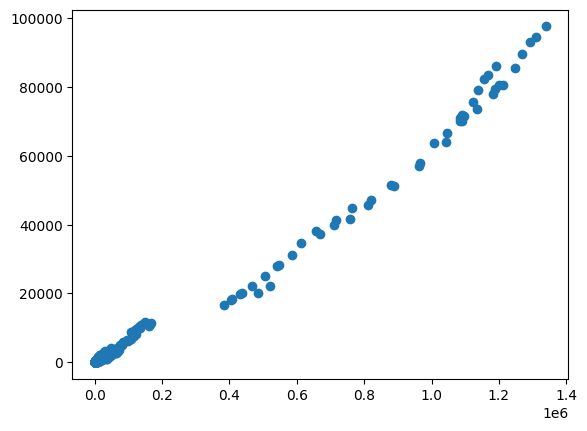

In [31]:
X = sentence_data['GT1-ratio']
Y = sentence_data['SUIC-ratio']

plt.scatter(X,Y)

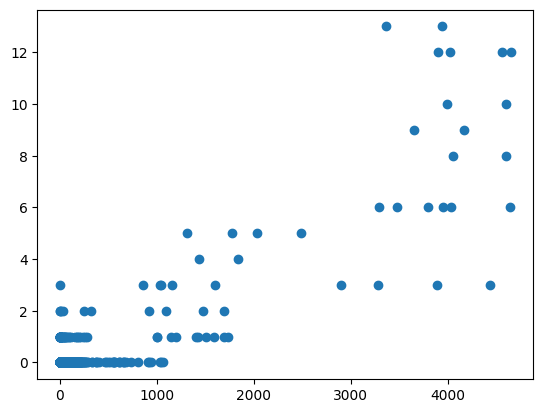

In [21]:
X = sentence_data['CUSLT1F']
Y = sentence_data['DTHSUICF']

plt.scatter(X,Y)

In [18]:
parole_data = prison_data[['RLCODPM', 'RLCODPF', 'PARNEWM', 'PARNEWF', 'CUSTOTM', 'CUSTOTF']]
parole_data = parole_data.dropna()

# ratio of male prisoners released on parole to total population
parole_data['DP-M'] = parole_data['RLCODPM'] / parole_data['CUSTOTM']

# ratio of female prisoners released on parole to total population
parole_data['DP-F'] = parole_data['RLCODPF'] / parole_data['CUSTOTF']

# ratio of male parole violators to total population
parole_data['PV-M'] = parole_data['PARNEWM'] / parole_data['CUSTOTM']

# ratio of female parole violators on parole to total population
parole_data['PV-F'] = parole_data['PARNEWF'] / parole_data['CUSTOTF']

parole_data['F'] = 'red'
parole_data['M'] = 'blue'

dp_m = pd.concat([parole_data['DP-M'], parole_data['M']], axis=1)
dp_m.columns = ['DP', 'SEX']

dp_f = pd.concat([parole_data['DP-F'], parole_data['F']], axis=1)
dp_f.columns = ['DP', 'SEX']

pv_m = pd.concat([parole_data['PV-M'], parole_data['M']], axis=1)
pv_m.columns = ['PV', 'SEX1']

pv_f = pd.concat([parole_data['PV-F'], parole_data['F']], axis=1)
pv_f.columns = ['PV', 'SEX1']

dp = pd.concat([dp_m, dp_f])
pv = pd.concat([pv_m, pv_f])

parole_data_2 = pd.concat([dp, pv], axis=1)
parole_data_2

,DP,SEX,PV,SEX1
270,0.110122,blue,0.011392,blue
272,0.096863,blue,0.013250,blue
273,0.352538,blue,0.102284,blue
275,0.521739,blue,0.043156,blue
276,0.158049,blue,0.020760,blue
...,...,...,...,...
1831,0.015332,red,0.000000,red
1832,0.349345,red,0.008734,red
1833,0.199843,red,0.031599,red
1834,0.174407,red,0.027959,red


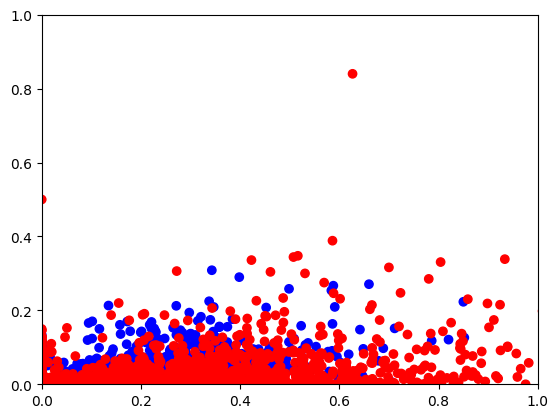

In [19]:
x = parole_data_2['DP']
y = parole_data_2['PV']
colors = parole_data_2['SEX']

plt.scatter(x, y, c=colors)
plt.ylim(0,1)
plt.xlim(0,1)
plt.show()

In [11]:
path = GOOGLE_DRIVE_PATH + '/crime_and_incarceration_by_state.csv'
prison_data_2 = pd.read_csv(path)
prison_data_2

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft
0,FEDERAL,False,2001,149852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALABAMA,False,2001,24741,False,False,4468912.0,19582.0,379.0,1369.0,NaN,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0
2,ALASKA,True,2001,4570,False,False,633630.0,3735.0,39.0,501.0,NaN,514.0,2681.0,23160.0,3847.0,16695.0,2618.0
3,ARIZONA,False,2001,27710,False,False,5306966.0,28675.0,400.0,1518.0,NaN,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0
4,ARKANSAS,False,2001,11489,False,False,2694698.0,12190.0,148.0,892.0,NaN,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,VIRGINIA,False,2016,29882,False,False,8414380.0,18495.0,482.0,NaN,2830.0,4826.0,10357.0,157292.0,20159.0,127285.0,9848.0
812,WASHINGTON,False,2016,17228,False,False,7280934.0,22101.0,195.0,NaN,3133.0,5649.0,13124.0,254994.0,49249.0,173423.0,32322.0
813,WEST VIRGINIA,False,2016,5899,False,False,1828637.0,6633.0,85.0,NaN,684.0,720.0,5144.0,37282.0,9127.0,25657.0,2498.0
814,WISCONSIN,False,2016,23163,False,False,5772917.0,17716.0,232.0,NaN,2005.0,4707.0,10772.0,111911.0,19498.0,82455.0,9958.0


In [12]:
prison_data_2['prisoner_ratio'] = prison_data_2['prisoner_count'] / prison_data_2['state_population'] * 100
prison_data_2['violent_crime_ratio'] = prison_data_2['violent_crime_total'] / prison_data_2['state_population'] * 100
prison_data_2['property_crime_ratio'] = prison_data_2['property_crime_total'] / prison_data_2['state_population'] * 100
prison_data_2

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,prisoner_ratio,violent_crime_ratio,property_crime_ratio
0,FEDERAL,False,2001,149852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALABAMA,False,2001,24741,False,False,4468912.0,19582.0,379.0,1369.0,NaN,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0,0.553625,0.438183,3.876850
2,ALASKA,True,2001,4570,False,False,633630.0,3735.0,39.0,501.0,NaN,514.0,2681.0,23160.0,3847.0,16695.0,2618.0,0.721241,0.589461,3.655130
3,ARIZONA,False,2001,27710,False,False,5306966.0,28675.0,400.0,1518.0,NaN,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0,0.522144,0.540328,5.537514
4,ARKANSAS,False,2001,11489,False,False,2694698.0,12190.0,148.0,892.0,NaN,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0,0.426356,0.452370,3.677815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,VIRGINIA,False,2016,29882,False,False,8414380.0,18495.0,482.0,NaN,2830.0,4826.0,10357.0,157292.0,20159.0,127285.0,9848.0,0.355130,0.219802,1.869324
812,WASHINGTON,False,2016,17228,False,False,7280934.0,22101.0,195.0,NaN,3133.0,5649.0,13124.0,254994.0,49249.0,173423.0,32322.0,0.236618,0.303546,3.502216
813,WEST VIRGINIA,False,2016,5899,False,False,1828637.0,6633.0,85.0,NaN,684.0,720.0,5144.0,37282.0,9127.0,25657.0,2498.0,0.322590,0.362729,2.038786
814,WISCONSIN,False,2016,23163,False,False,5772917.0,17716.0,232.0,NaN,2005.0,4707.0,10772.0,111911.0,19498.0,82455.0,9958.0,0.401236,0.306881,1.938552


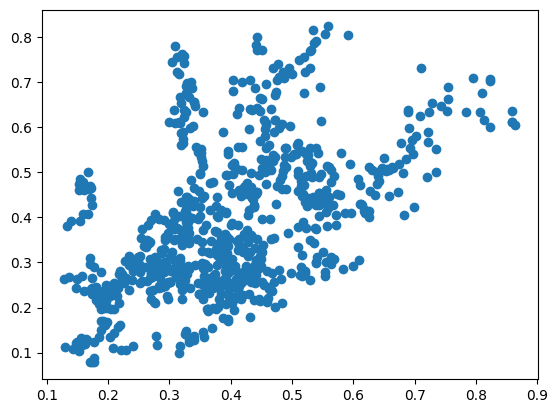

In [14]:
X = prison_data_2['prisoner_ratio']
Y = prison_data_2['violent_crime_ratio']

plt.scatter(X,Y)

In [15]:
X = prison_data_2[['property_crime_ratio', 'violent_crime_ratio']]
Y = prison_data_2['prisoner_ratio']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

x_train.shape, x_test.shape

((612, 2), (204, 2))

In [70]:
violent_crime_model = LinearRegression()
violent_crime_model.fit(x_train, y_train)
y_pred = violent_crime_model.predict(x_test)
mean_squared_error(y_test, y_pred)

0.015209637674535467

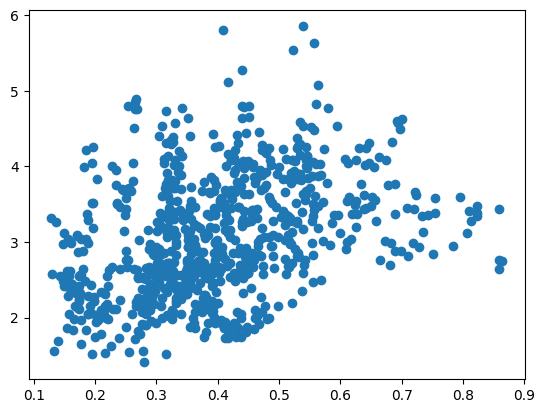

In [57]:
X = prison_data_2['prisoner_ratio']
Y = prison_data_2['property_crime_ratio']

plt.scatter(X,Y)

property_crime_model = LinearRegression()

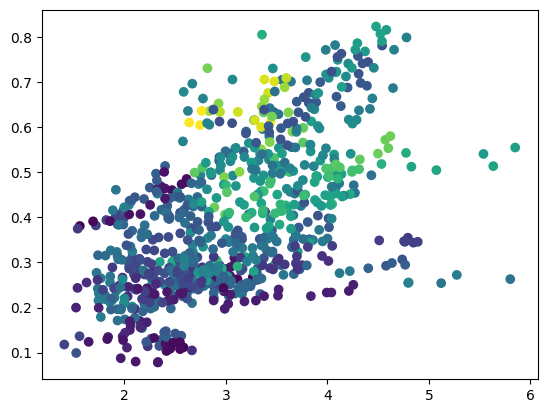

In [58]:
X = prison_data_2['property_crime_ratio']
Y = prison_data_2['violent_crime_ratio']
colors = prison_data_2['prisoner_ratio']

plt.scatter(X,Y, c=colors)

In [16]:
path = GOOGLE_DRIVE_PATH + '/unemployment.csv'
unemployment_data = pd.read_csv(path, usecols=['State/Area', 'Year', 'Percent (%) of Labor Force Employed in State/Area', 'Month'])
unemployment_data.columns = ['jurisdiction', 'year', 'month', 'percent_employed']
unemployment_data = unemployment_data[unemployment_data['year'] >= 2001]
unemployment_data = unemployment_data[unemployment_data['year'] <= 2016]
unemployment_data = unemployment_data[unemployment_data['month'] == 1]
unemployment_data['jurisdiction'] = unemployment_data['jurisdiction'].str.upper()

In [17]:
unemployment_data

,jurisdiction,year,month,percent_employed
15900,ALABAMA,2001,1,60.2
15901,ALASKA,2001,1,68.3
15902,ARIZONA,2001,1,62.8
15903,ARKANSAS,2001,1,59.3
15904,CALIFORNIA,2001,1,64.0
...,...,...,...,...
25488,VIRGINIA,2016,1,62.3
25489,WASHINGTON,2016,1,60.1
25490,WEST VIRGINIA,2016,1,50.0
25491,WISCONSIN,2016,1,65.3


In [18]:
prison_data_2

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,prisoner_ratio,violent_crime_ratio,property_crime_ratio
0,FEDERAL,False,2001,149852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALABAMA,False,2001,24741,False,False,4468912.0,19582.0,379.0,1369.0,NaN,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0,0.553625,0.438183,3.876850
2,ALASKA,True,2001,4570,False,False,633630.0,3735.0,39.0,501.0,NaN,514.0,2681.0,23160.0,3847.0,16695.0,2618.0,0.721241,0.589461,3.655130
3,ARIZONA,False,2001,27710,False,False,5306966.0,28675.0,400.0,1518.0,NaN,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0,0.522144,0.540328,5.537514
4,ARKANSAS,False,2001,11489,False,False,2694698.0,12190.0,148.0,892.0,NaN,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0,0.426356,0.452370,3.677815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,VIRGINIA,False,2016,29882,False,False,8414380.0,18495.0,482.0,NaN,2830.0,4826.0,10357.0,157292.0,20159.0,127285.0,9848.0,0.355130,0.219802,1.869324
812,WASHINGTON,False,2016,17228,False,False,7280934.0,22101.0,195.0,NaN,3133.0,5649.0,13124.0,254994.0,49249.0,173423.0,32322.0,0.236618,0.303546,3.502216
813,WEST VIRGINIA,False,2016,5899,False,False,1828637.0,6633.0,85.0,NaN,684.0,720.0,5144.0,37282.0,9127.0,25657.0,2498.0,0.322590,0.362729,2.038786
814,WISCONSIN,False,2016,23163,False,False,5772917.0,17716.0,232.0,NaN,2005.0,4707.0,10772.0,111911.0,19498.0,82455.0,9958.0,0.401236,0.306881,1.938552


In [19]:
both_data = pd.merge(unemployment_data, prison_data_2, on=['jurisdiction', 'year'], how='inner')
both_data

,jurisdiction,year,month,percent_employed,includes_jails,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,...,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,prisoner_ratio,violent_crime_ratio,property_crime_ratio
0,ALABAMA,2001,1,60.2,False,24741,False,False,4468912.0,19582.0,...,NaN,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0,0.553625,0.438183,3.876850
1,ALASKA,2001,1,68.3,True,4570,False,False,633630.0,3735.0,...,NaN,514.0,2681.0,23160.0,3847.0,16695.0,2618.0,0.721241,0.589461,3.655130
2,ARIZONA,2001,1,62.8,False,27710,False,False,5306966.0,28675.0,...,NaN,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0,0.522144,0.540328,5.537514
3,ARKANSAS,2001,1,59.3,False,11489,False,False,2694698.0,12190.0,...,NaN,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0,0.426356,0.452370,3.677815
4,CALIFORNIA,2001,1,64.0,False,157142,False,False,34600463.0,212867.0,...,NaN,64614.0,136087.0,1134189.0,232273.0,697739.0,204177.0,0.454162,0.615214,3.277959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,VIRGINIA,2016,1,62.3,False,29882,False,False,8414380.0,18495.0,...,2830.0,4826.0,10357.0,157292.0,20159.0,127285.0,9848.0,0.355130,0.219802,1.869324
796,WASHINGTON,2016,1,60.1,False,17228,False,False,7280934.0,22101.0,...,3133.0,5649.0,13124.0,254994.0,49249.0,173423.0,32322.0,0.236618,0.303546,3.502216
797,WEST VIRGINIA,2016,1,50.0,False,5899,False,False,1828637.0,6633.0,...,684.0,720.0,5144.0,37282.0,9127.0,25657.0,2498.0,0.322590,0.362729,2.038786
798,WISCONSIN,2016,1,65.3,False,23163,False,False,5772917.0,17716.0,...,2005.0,4707.0,10772.0,111911.0,19498.0,82455.0,9958.0,0.401236,0.306881,1.938552


In [20]:
nan_counts = both_data.isna().sum()
nan_counts = nan_counts[nan_counts < 400]
print(f"\nNaN counts per column:\n{nan_counts}")


NaN counts per column:
jurisdiction               0
year                       0
month                      0
percent_employed           0
includes_jails             0
prisoner_count             0
crime_reporting_change     1
crimes_estimated           1
state_population           1
violent_crime_total        1
murder_manslaughter        1
rape_legacy               51
robbery                    1
agg_assault                1
property_crime_total       1
burglary                   1
larceny                    1
vehicle_theft              1
prisoner_ratio             1
violent_crime_ratio        1
property_crime_ratio       1
dtype: int64


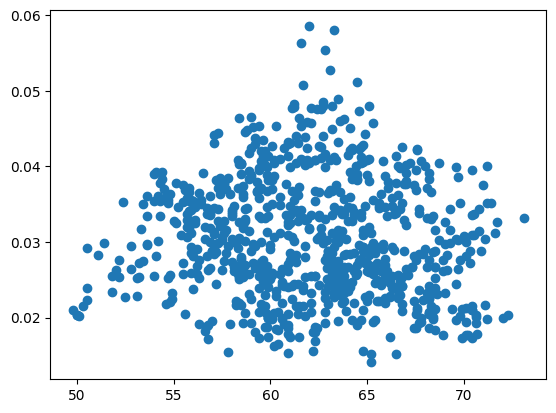

In [37]:
X = both_data['percent_employed']
Y = both_data['property_crime_total'] / both_data['state_population']

plt.scatter(X,Y)

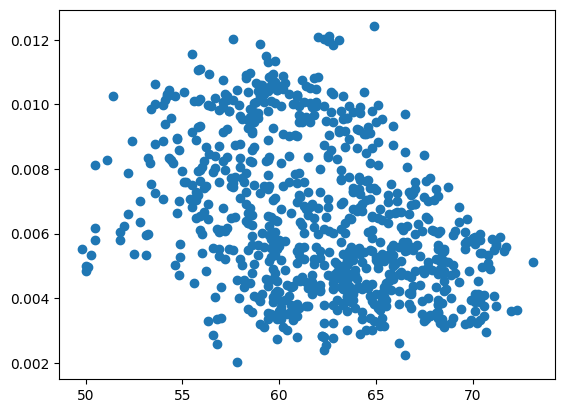

In [84]:
X = both_data['percent_employed']
Y = both_data['burglary'] / both_data['state_population']

X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

og_index = Y.index

Y = Y.dropna()

new_index = Y.index
index_dif = og_index.difference(new_index)

X = X.drop(index_dif)

X.shape, Y.shape

plt.scatter(X,Y)

In [94]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mean_squared_error(y_test, y_pred)

4.69365164167785e-06

Text(0, 0.5, 'Rate of Burglary')

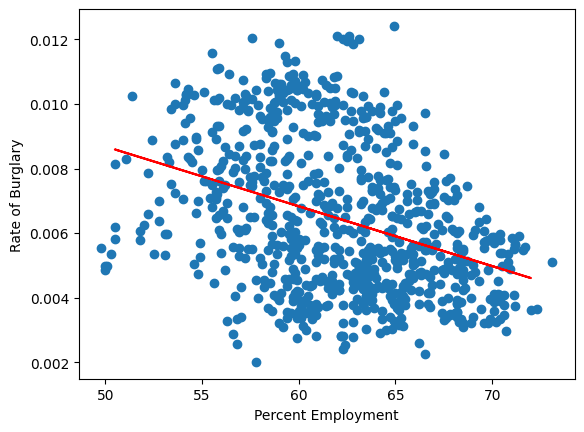

In [93]:
 fig, ax = plt.subplots()
 ax.scatter(X,Y)
 ax.plot(x_test, y_pred, color='red', label='Regression line')
 ax.set_xlabel('Percent Employment')
 ax.set_ylabel('Rate of Burglary')

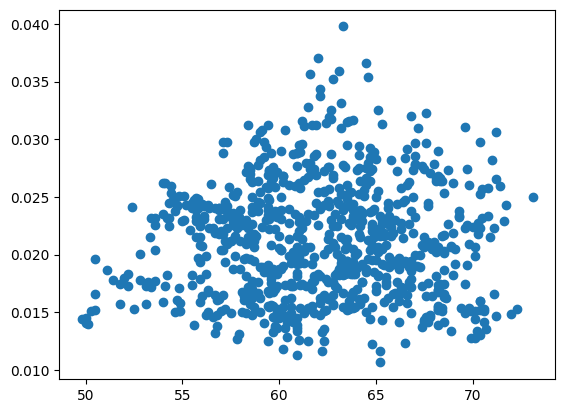

In [39]:
X = both_data['percent_employed']
Y = both_data['larceny'] / both_data['state_population']

plt.scatter(X,Y)

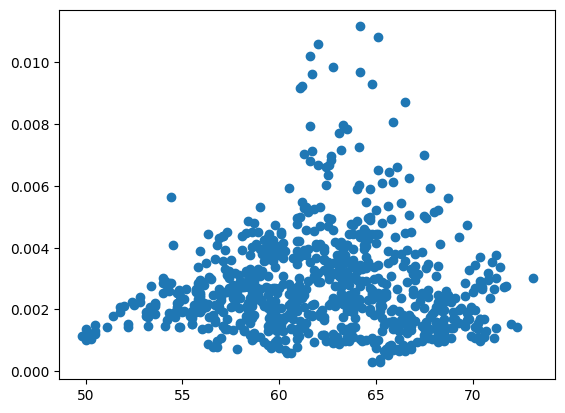

In [95]:
X = both_data['percent_employed']
Y = both_data['vehicle_theft'] / both_data['state_population']

X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

og_index = Y.index

Y = Y.dropna()

new_index = Y.index
index_dif = og_index.difference(new_index)

X = X.drop(index_dif)

X.shape, Y.shape

plt.scatter(X,Y)

In [99]:
polydegree = 2
poly = PolynomialFeatures(degree=polydegree)
x_poly = poly.fit_transform(X) # This is the new generated features.

print (polynomial_x.shape)

(799, 3)


In [36]:
both_data['vehicle_theft'] / both_data['prisoner_count']

,0
0,0.510044
1,0.572867
2,1.883905
3,0.637131
4,1.299315
...,...
795,0.329563
796,1.876132
797,0.423462
798,0.429910
